In [1]:
import numpy as np 
import pandas as pd                       
import matplotlib.pyplot as plt          
import seaborn as sb                            
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,roc_auc_score

In [2]:
df = pd.read_csv('employedetails.csv')
df.head()

,employee_id,employee_name,email,phone_no,hire_date,job_id,salary,no_of_projects,manager_id,department_id,working_hours
0,501,Rama,rama@gmail.com,7575000470,16-11-2009,111,612022,20,8111,724,234
1,502,Ravi,ravi@gmail.com,7741071474,17-03-2004,222,558253,20,9524,536,264
2,503,Raj,raju@gmail.com,8283951351,16-11-2009,333,882978,20,4711,724,255
3,504,Rajesh,rajesh@gmail.com,9518203146,19-10-2011,444,885884,23,4235,724,250
4,505,Shiva,va@gmail.com,7894632886,13-08-1998,111,773391,19,6982,856,250


In [3]:
df.columns 

Index(['employee_id', 'employee_name', 'email', 'phone_no', 'hire_date',
       'job_id', 'salary', 'no_of_projects', 'manager_id', 'department_id',
       'working_hours'],
      dtype='object')

In [4]:
X = df[['employee_id', 'employee_name', 'email', 'phone_no', 'hire_date',
       'job_id', 'salary', 'no_of_projects', 'manager_id', 'department_id',
       'working_hours']]

In [5]:
X.shape

(50, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     50 non-null     int64 
 1   employee_name   50 non-null     object
 2   email           50 non-null     object
 3   phone_no        50 non-null     int64 
 4   hire_date       50 non-null     object
 5   job_id          50 non-null     int64 
 6   salary          50 non-null     int64 
 7   no_of_projects  50 non-null     int64 
 8   manager_id      50 non-null     int64 
 9   department_id   50 non-null     int64 
 10  working_hours   50 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.4+ KB


In [7]:
df_numerical = df.select_dtypes(include='int64')

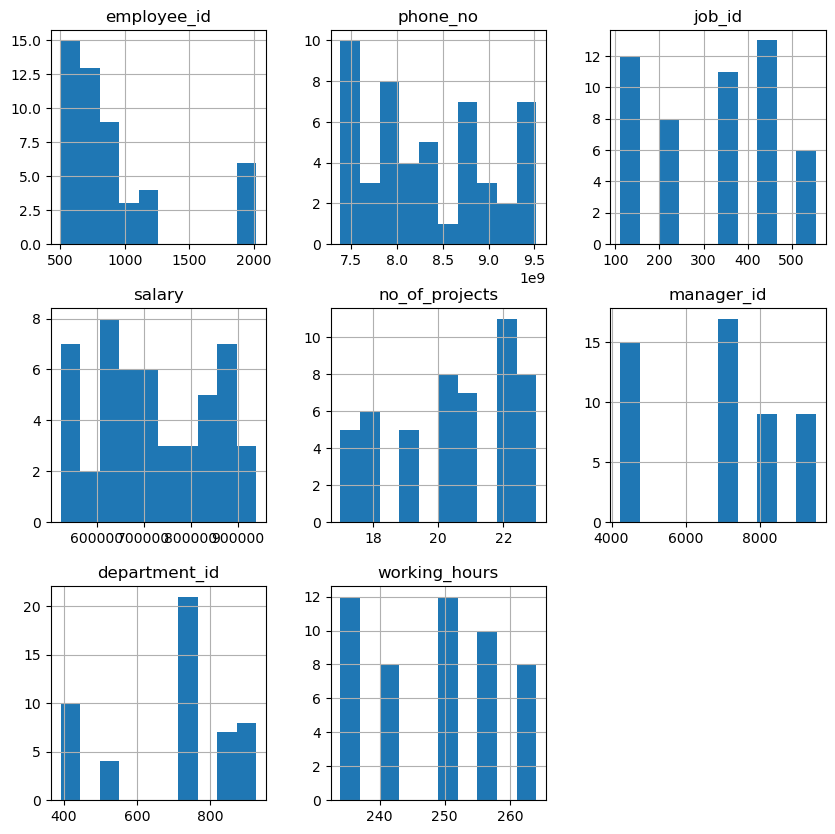

In [8]:
df_numerical.hist(figsize=(10,10),); 

In [9]:
df.corr()

C:\Users\RAY\AppData\Local\Temp\ipykernel_14444\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,employee_id,phone_no,job_id,salary,no_of_projects,manager_id,department_id,working_hours
employee_id,1.000000,-0.059449,0.110719,-0.136309,0.037862,0.027025,0.035483,0.192342
phone_no,-0.059449,1.000000,-0.064429,-0.029391,0.168561,-0.179931,-0.143217,-0.122275
job_id,0.110719,-0.064429,1.000000,0.078642,0.022342,-0.226668,0.108834,0.225209
salary,-0.136309,-0.029391,0.078642,1.000000,-0.025625,0.017393,0.104568,-0.030480
no_of_projects,0.037862,0.168561,0.022342,-0.025625,1.000000,-0.025904,0.026296,0.017813
manager_id,0.027025,-0.179931,-0.226668,0.017393,-0.025904,1.000000,-0.020505,-0.090228
department_id,0.035483,-0.143217,0.108834,0.104568,0.026296,-0.020505,1.000000,-0.181475
working_hours,0.192342,-0.122275,0.225209,-0.030480,0.017813,-0.090228,-0.181475,1.000000


C:\Users\RAY\AppData\Local\Temp\ipykernel_14444\3081851975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),cmap="magma",annot=True,linecolor="black",linewidths=1)


<Axes: >

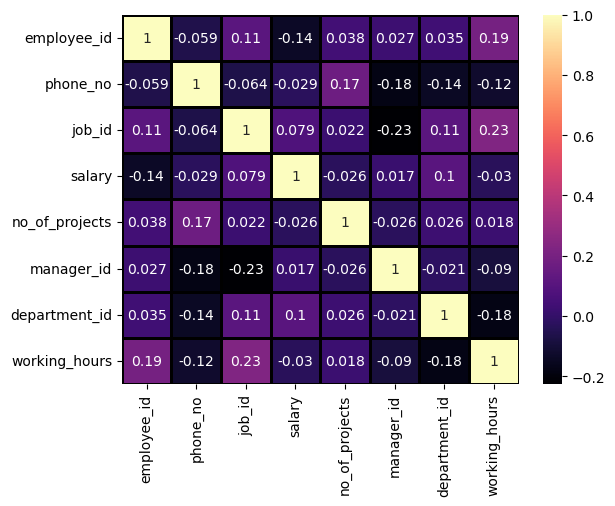

In [10]:
sb.heatmap(df.corr(),cmap="magma",annot=True,linecolor="black",linewidths=1) 

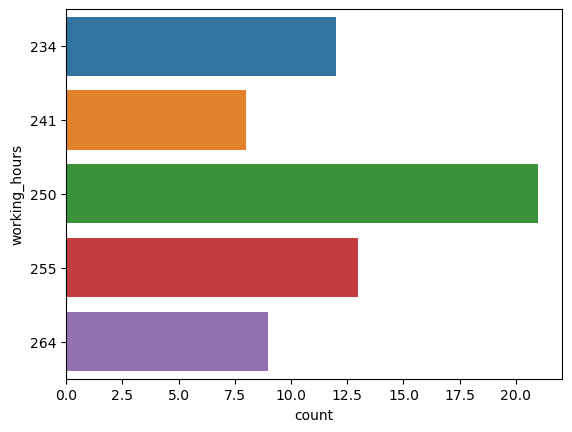

In [11]:
for column in df.dtypes[df.dtypes=='int64'].index:              
    sb.countplot(data=df, y='{}'.format(column))

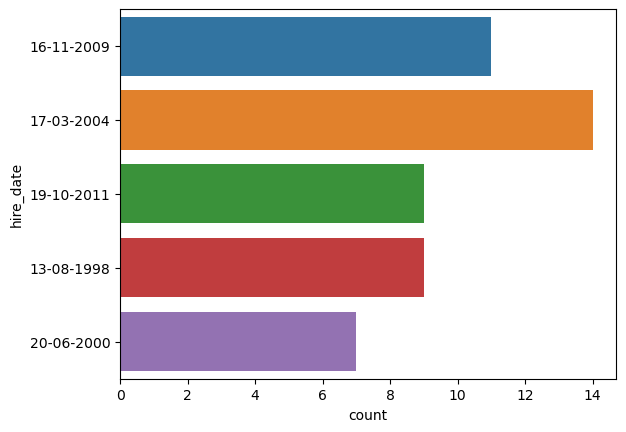

In [12]:
for column in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(data=df, y='{}'.format(column))    

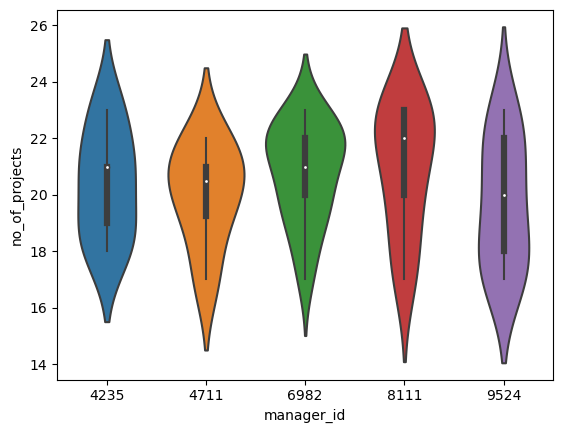

In [13]:
sb.violinplot(y='no_of_projects', x='manager_id', data=df); 

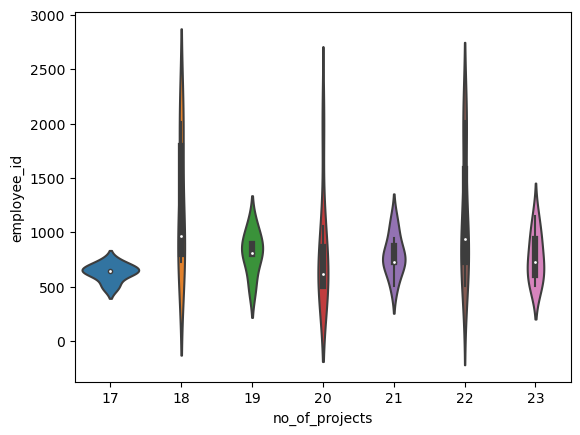

In [14]:
sb.violinplot(y='employee_id', x='no_of_projects', data=df);  

In [15]:
y = df['department_id']                            
X = df[['employee_id', 'phone_no','job_id', 'salary', 'no_of_projects', 'manager_id','working_hours']] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=525,) 

In [17]:
rfc  = RandomForestClassifier(n_estimators = 51,criterion="entropy") 

In [18]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=51)

In [19]:
y_pred = rfc.predict(X_test) 
y_pred

array([724, 391, 724, 724, 724, 724, 925, 856, 925, 856, 724, 391, 724,
       536, 724, 724, 724, 856, 391, 856, 724, 724, 925, 391, 724, 724,
       391, 856, 724, 856, 724, 391, 724, 856, 925], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix ,classification_report             
cm= confusion_matrix(y_test, y_pred)                                     
print(cm)
print(classification_report(y_test, y_pred)) ; 

[[1 0 5 1 0]
 [1 0 1 0 0]
 [2 1 8 2 3]
 [1 0 1 2 0]
 [1 0 2 2 1]]
              precision    recall  f1-score   support

         391       0.17      0.14      0.15         7
         536       0.00      0.00      0.00         2
         724       0.47      0.50      0.48        16
         856       0.29      0.50      0.36         4
         925       0.25      0.17      0.20         6

    accuracy                           0.34        35
   macro avg       0.23      0.26      0.24        35
weighted avg       0.32      0.34      0.33        35



In [21]:
from sklearn.metrics import mean_absolute_error               

mean_absolute_error(y_test, y_pred)

167.28571428571428

In [22]:
pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

[[1 0 5 1 0]
 [1 0 1 0 0]
 [2 1 8 2 3]
 [1 0 1 2 0]
 [1 0 2 2 1]]


In [23]:
print('Accuracy:', accuracy_score(y_test, pred))  

Accuracy: 0.34285714285714286


In [24]:
precision = cm[2][2]/(cm[2][0]+cm[2][2])                
print('Precision:', precision);                       

Precision: 0.8


In [25]:
recall = cm[2][2]/(cm[0][2]+cm[2][2])                    
print('Recall:', recall);  

Recall: 0.6153846153846154


In [26]:
F1 = 2*(precision*recall)/(precision+recall)                     
print('F1:', F1)

F1: 0.6956521739130435


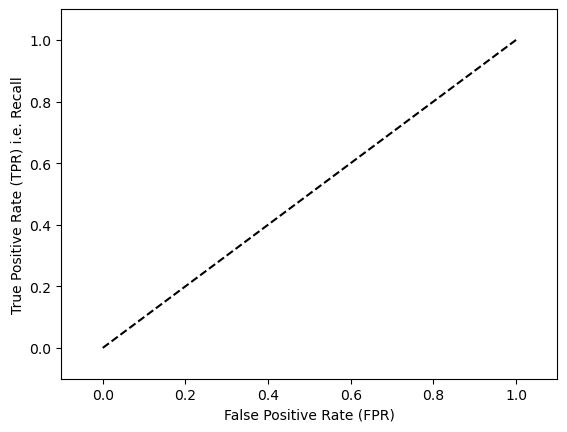

In [27]:
plt.plot([0,1],[0,1],'k--')                                                            
plt.xlim([-0.1,1.1])                     
plt.ylim([-0.1,1.1])                    
plt.ylabel('True Positive Rate (TPR) i.e. Recall')      
plt.xlabel('False Positive Rate (FPR)')            
plt.show()  